# Part A

# Hierarchical Clustering

In [6]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [7]:
#Read the dataset
a=pd.read_csv('EastWestAirlines.csv')
a

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [8]:
#To find whether there are any existing null values or not
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [9]:
#Count of duplicated rows
a[a.duplicated()]

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?


<AxesSubplot:>

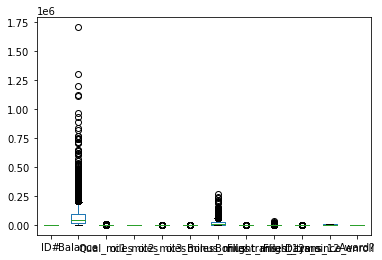

In [10]:
#Outlier Detection
a.plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x25c0ac6c610>,
 'caps': [<matplotlib.lines.Line2D at 0x25c0ac6ccd0>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c0ac6c2b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c0ac78400>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c0ac78760>],
 'means': []}

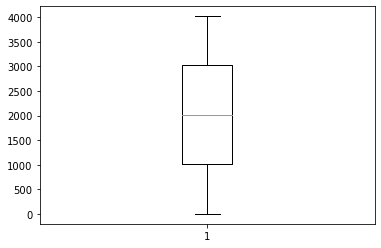

In [11]:
#Outlier Detection
plt.boxplot(a['ID#'])

{'whiskers': [<matplotlib.lines.Line2D at 0x25c0accdf10>,
 'caps': [<matplotlib.lines.Line2D at 0x25c0acdb610>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c0accdbb0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c0acdbd00>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c0ace80a0>],
 'means': []}

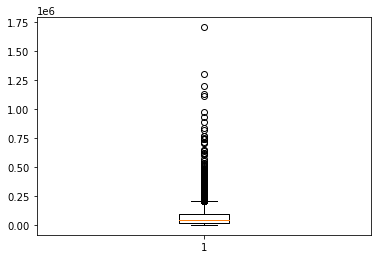

In [12]:
plt.boxplot(a['Balance'])

In [13]:
a.Balance.describe()

count    3.999000e+03
mean     7.360133e+04
std      1.007757e+05
min      0.000000e+00
25%      1.852750e+04
50%      4.309700e+04
75%      9.240400e+04
max      1.704838e+06
Name: Balance, dtype: float64

In [14]:
IQR = 9.240400e+04 - 1.852750e+04
IQR

73876.5

In [15]:
#Calculation of upper fence
upper_fence = 9.240400e+04 + (1.5*IQR)
upper_fence

203218.75

In [16]:
index=a[a.Balance>203218.75].index
a = a.drop(index,axis=0)

<AxesSubplot:>

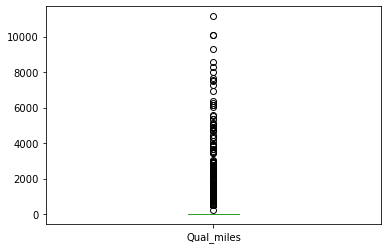

In [17]:
a.Qual_miles.plot(kind='box')

<AxesSubplot:>

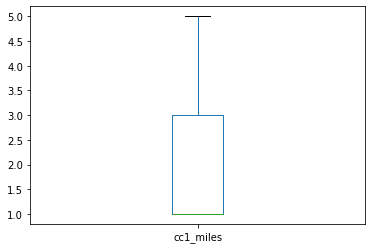

In [18]:
a.cc1_miles.plot(kind='box')

<AxesSubplot:>

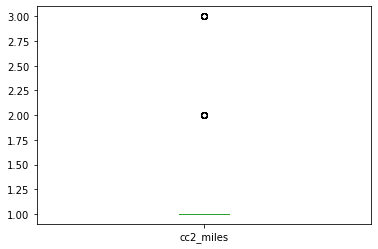

In [19]:
a.cc2_miles.plot(kind='box')

<AxesSubplot:>

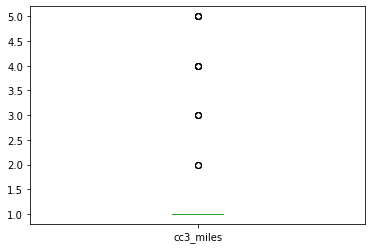

In [20]:
a.cc3_miles.plot(kind='box')

<AxesSubplot:>

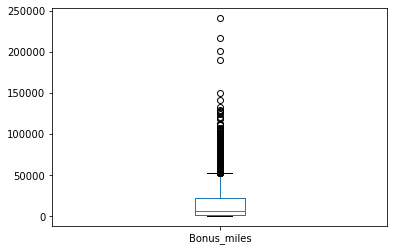

In [21]:
a.Bonus_miles.plot(kind='box')

In [22]:
a.Bonus_miles.describe()

count      3733.000000
mean      15328.525047
std       21336.284431
min           0.000000
25%        1100.000000
50%        6250.000000
75%       21559.000000
max      240544.000000
Name: Bonus_miles, dtype: float64

In [23]:
IQR = 21559.000000 - 1100.000000
IQR

20459.0

In [24]:
#Calculation of upper fence
upper_fence = 21559.000000 + (1.5*IQR)
upper_fence

52247.5

In [25]:
index=a[a.Bonus_miles>52247.5].index
a = a.drop(index,axis=0)

<AxesSubplot:>

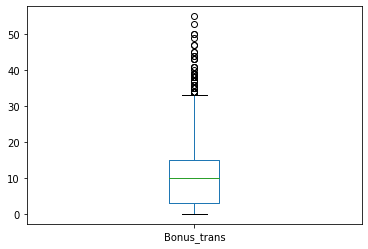

In [26]:
a.Bonus_trans.plot(kind='box')

In [27]:
a.Bonus_trans.describe()

count    3473.000000
mean       10.149726
std         8.460911
min         0.000000
25%         3.000000
50%        10.000000
75%        15.000000
max        55.000000
Name: Bonus_trans, dtype: float64

In [28]:
IQR = 15.000000 - 3.000000
IQR

12.0

In [29]:
#Calculation of upper fence
upper_fence = 15.000000 + (1.5*IQR)
upper_fence

33.0

In [30]:
index=a[a.Bonus_trans>33.0].index
a = a.drop(index,axis=0)

<AxesSubplot:>

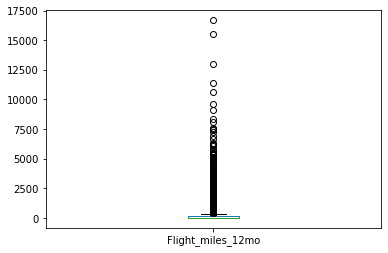

In [31]:
a.Flight_miles_12mo.plot(kind='box')

<AxesSubplot:>

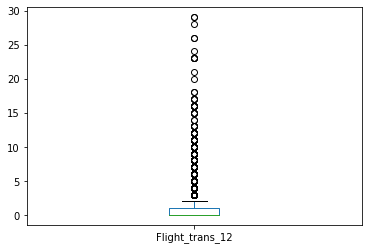

In [32]:
a.Flight_trans_12.plot(kind='box')

In [33]:
a.Flight_trans_12.describe()

count    3417.000000
mean        0.950541
std         2.601040
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max        29.000000
Name: Flight_trans_12, dtype: float64

In [34]:
IQR =  1.000000 -  0.000000
IQR

1.0

In [35]:
#Calculation of upper fence
upper_fence =  1.000000 + (1.5*IQR)
upper_fence

2.5

In [36]:
index=a[a.Bonus_trans>2.5].index
a = a.drop(index,axis=0)

<AxesSubplot:>

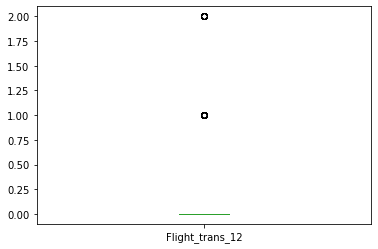

In [37]:
a.Flight_trans_12.plot(kind='box')

<AxesSubplot:>

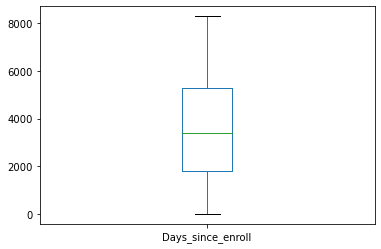

In [38]:
a.Days_since_enroll.plot(kind='box')

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

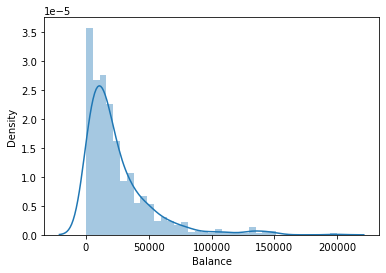

In [39]:
#To check whether the distribution is normal
sns.distplot(a['Balance'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Balance', ylabel='Density'>

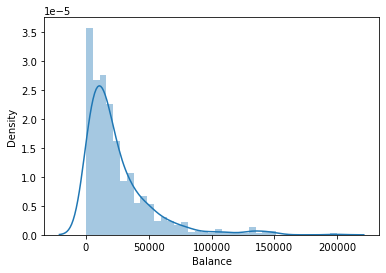

In [40]:
sns.distplot(a['Balance'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Qual_miles', ylabel='Density'>

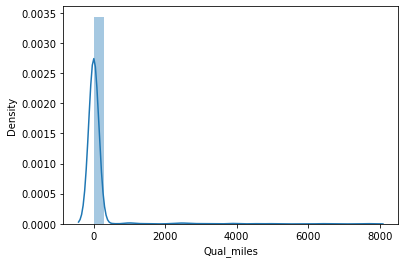

In [41]:
sns.distplot(a['Qual_miles'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='cc1_miles', ylabel='Density'>

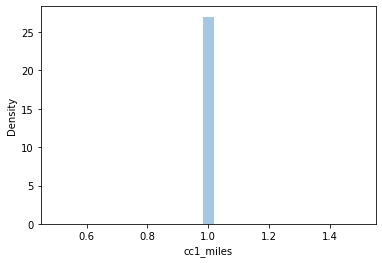

In [42]:
sns.distplot(a['cc1_miles'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='cc2_miles', ylabel='Density'>

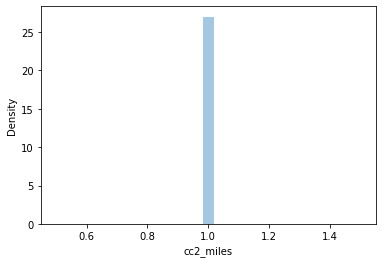

In [43]:
sns.distplot(a['cc2_miles'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='cc3_miles', ylabel='Density'>

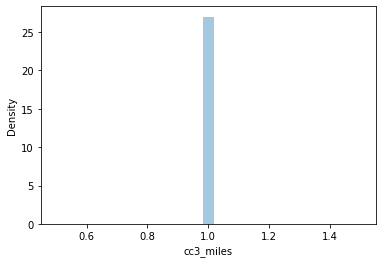

In [44]:
sns.distplot(a['cc3_miles'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_miles', ylabel='Density'>

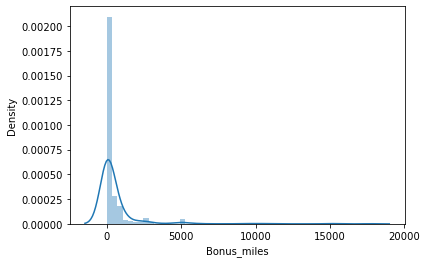

In [45]:
sns.distplot(a['Bonus_miles'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Bonus_trans', ylabel='Density'>

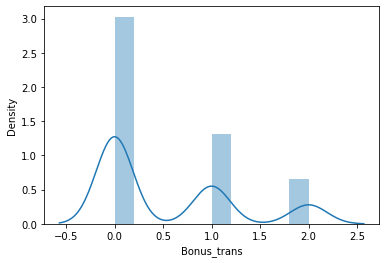

In [46]:
sns.distplot(a['Bonus_trans'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_miles_12mo', ylabel='Density'>

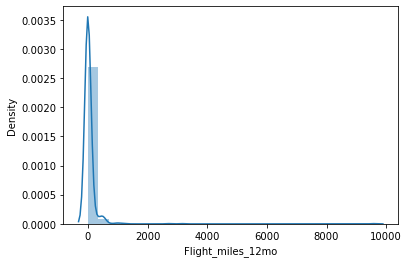

In [47]:
sns.distplot(a['Flight_miles_12mo'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Flight_trans_12', ylabel='Density'>

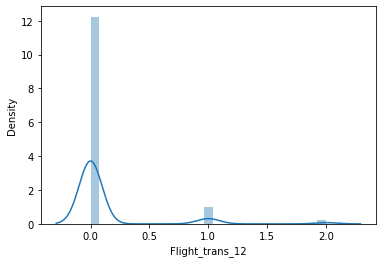

In [48]:
sns.distplot(a['Flight_trans_12'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Days_since_enroll', ylabel='Density'>

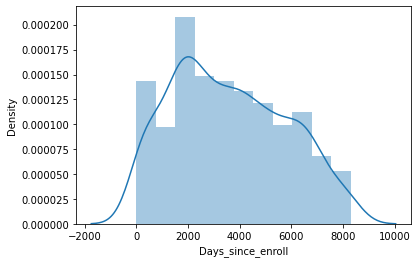

In [49]:
sns.distplot(a['Days_since_enroll'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Award?', ylabel='Density'>

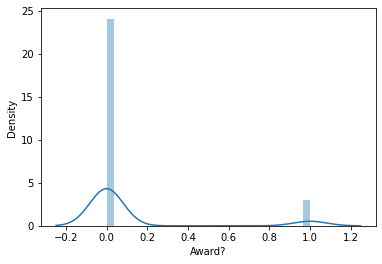

In [50]:
sns.distplot(a['Award?'])

In [51]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Standardization function 
def std_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [52]:
df_norm = a.fillna(1)
df_norm

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
5,6,16420,0,1,1,1,0,0,0,0,6942,0
14,15,17648,0,1,1,1,0,0,0,0,6912,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3981,4004,1010,0,1,1,1,0,0,0,0,1423,0
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


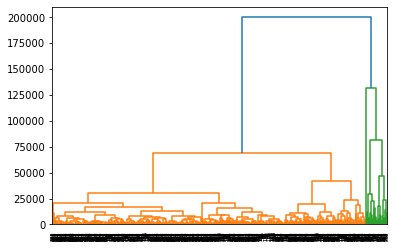

In [53]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [54]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [55]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,1
2,1
3,1
4,1
...,...
773,1
774,1
775,1
776,0


In [56]:
df_norm1=df_norm['h_clusterid']= pd.Series(y_hc)
df_norm1

0      1
1      1
2      1
3      1
4      1
      ..
773    1
774    1
775    1
776    0
777    1
Length: 778, dtype: int64

In [57]:
result=df_norm.iloc[:,1:].groupby(df_norm.h_clusterid).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
h_clusterid,,,,,,,,,,,,
0.0,36567.258065,16.129032,1.0,1.0,1.0,442.161290,0.677419,158.935484,0.290323,7353.741935,0.161290,0.0
1.0,27820.103448,41.103448,1.0,1.0,1.0,405.413793,0.517241,14.942529,0.045977,6965.275862,0.126437,1.0
2.0,50809.000000,0.000000,1.0,1.0,1.0,5634.000000,1.000000,0.000000,0.000000,7079.000000,1.000000,2.0
3.0,19702.000000,0.000000,1.0,1.0,1.0,3000.000000,1.000000,0.000000,0.000000,6554.000000,1.000000,3.0
4.0,24581.000000,0.000000,1.0,1.0,1.0,248.000000,0.714286,0.000000,0.000000,7142.000000,0.000000,4.0


In [58]:
#Inferences
#The Clusters are named according to their Bonus_miles so that customer belongs to which membership - 
#Tier 1 Membership-Third cluster
#Tier 2 Membership-Fourth cluster
#Tier 3 Membership-First cluster
#Tier 4 Membership-Second cluster
#Tier 5 Membership-Fifth cluster
#Therefore it will easy for the EastWest Airlines to classify the customers accordingly.

# Non-Hierarchial Clustering

In [59]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [60]:
q = df_norm.fillna(1)
q

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1.0
14,15,17648,0,1,1,1,0,0,0,0,6912,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,4004,1010,0,1,1,1,0,0,0,0,1423,0,1.0
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0,1.0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1.0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1.0


In [61]:
kmeans_clust=KMeans(n_clusters=8)
kmeans_clust.fit(q)
q["clusterID"]=pd.Series(kmeans_clust.labels_)
q

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0,6.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0,0.0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1.0,0.0
14,15,17648,0,1,1,1,0,0,0,0,6912,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,4004,1010,0,1,1,1,0,0,0,0,1423,0,1.0,NaN
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0,1.0,NaN
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1.0,NaN
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1.0,NaN


In [62]:
w = q.fillna(0)
w

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID
0,1,28143,0,1,1,1,174,1,0,0,7000,0,1.0,6.0
1,2,19244,0,1,1,1,215,2,0,0,6968,0,1.0,0.0
3,4,14776,0,1,1,1,500,1,0,0,6952,0,1.0,0.0
5,6,16420,0,1,1,1,0,0,0,0,6942,0,1.0,0.0
14,15,17648,0,1,1,1,0,0,0,0,6912,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3981,4004,1010,0,1,1,1,0,0,0,0,1423,0,1.0,0.0
3983,4006,26173,0,1,1,1,305,1,0,0,1418,0,1.0,0.0
3990,4013,11310,0,1,1,1,5021,2,0,0,1409,0,1.0,0.0
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0,1.0,0.0


In [63]:
result=w.iloc[:,1:].groupby(w.clusterID).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,h_clusterid,clusterID
clusterID,,,,,,,,,,,,,
0.0,23846.348770,78.972504,1.0,1.0,1.0,608.916064,0.520984,49.163531,0.108538,3163.221418,0.105644,1.000000,0.0
1.0,30045.428571,0.000000,1.0,1.0,1.0,1025.714286,0.857143,0.000000,0.000000,7392.285714,0.285714,0.428571,1.0
2.0,24581.000000,0.000000,1.0,1.0,1.0,248.000000,0.714286,0.000000,0.000000,7142.000000,0.000000,4.000000,2.0
3.0,20707.100000,0.000000,1.0,1.0,1.0,565.700000,1.000000,457.700000,0.700000,7324.200000,0.000000,0.000000,3.0
4.0,28152.314286,33.657143,1.0,1.0,1.0,354.028571,0.485714,17.142857,0.057143,6843.885714,0.085714,1.000000,4.0
5.0,62142.500000,0.000000,1.0,1.0,1.0,171.250000,0.625000,43.750000,0.250000,7566.625000,0.125000,0.000000,5.0
6.0,38832.000000,27.777778,1.0,1.0,1.0,404.111111,0.277778,27.777778,0.055556,6978.500000,0.222222,0.611111,6.0
7.0,50809.000000,0.000000,1.0,1.0,1.0,5634.000000,1.000000,0.000000,0.000000,7079.000000,1.000000,2.000000,7.0


In [64]:
k = list(range(2,10))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(w)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(w.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,w.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([9642868.33623413]),
 array([7124685.23859813]),
 array([5577325.99678596]),
 array([4621578.7028404]),
 array([4112572.88769571]),
 array([3713886.12365477]),
 array([3347040.94672007]),
 array([3278843.73908587])]

([<matplotlib.axis.XTick at 0x25c0df07c40>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

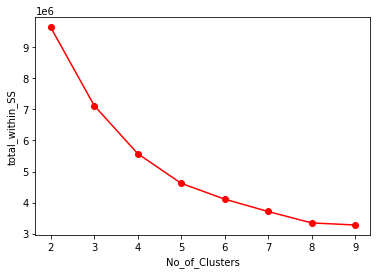

In [65]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [66]:
#Inferences
#The Clusters are named according to their Bonus_miles so that customer belongs to which membership - 
#Tier 1 Membership-Seventh cluster
#Tier 2 Membership-Second cluster
#Tier 3 Membership-First cluster
#Tier 4 Membership-Fourth cluster
#Tier 5 Membership-Sixth cluster
#Tier 6 Membership-Third cluster
#Tier 7 Membership-Fifth cluster
#Therefore it will easy for the EastWest Airlines to classify the customers accordingly.

# DB-SCAN

In [67]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [68]:
q=q.fillna(1)
array=q.values
array

array([[1.0000e+00, 2.8143e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        6.0000e+00],
       [2.0000e+00, 1.9244e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [4.0000e+00, 1.4776e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       ...,
       [4.0130e+03, 1.1310e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.0200e+03, 5.4899e+04, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00],
       [4.0210e+03, 3.0160e+03, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        1.0000e+00]])

In [69]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.89141866,  0.1221755 , -0.13473674, ..., -0.35022153,
         0.02151602,  4.1804328 ],
       [-1.89058271, -0.2102032 , -0.13473674, ..., -0.35022153,
         0.02151602, -1.14405842],
       [-1.88891081, -0.37708353, -0.13473674, ..., -0.35022153,
         0.02151602, -1.14405842],
       ...,
       [ 1.46242249, -0.50653904, -0.13473674, ..., -0.35022153,
         0.02151602, -0.25664321],
       [ 1.46827416,  1.12151527, -0.13473674, ..., -0.35022153,
         0.02151602, -0.25664321],
       [ 1.46911011, -0.81632093, -0.13473674, ..., -0.35022153,
         0.02151602, -0.25664321]])

In [70]:
dbscan = DBSCAN(eps=0.9, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=4)

In [71]:
#Noisy samples are given the label -1.
pd.Series(dbscan.labels_).value_counts()

 8     357
-1     174
 7      85
 9      41
 12     22
 6      22
 3      18
 2      18
 5       9
 1       7
 11      7
 4       5
 0       5
 13      4
 10      4
dtype: int64

In [72]:
cl= pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,-1
1,0
2,1
3,2
4,2
...,...
773,8
774,7
775,-1
776,12


In [73]:
q=q.iloc[:,1:12]
pd.concat([q,cl],axis=1)

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,cluster
0,28143.0,0.0,1.0,1.0,1.0,174.0,1.0,0.0,0.0,7000.0,0.0,-1.0
1,19244.0,0.0,1.0,1.0,1.0,215.0,2.0,0.0,0.0,6968.0,0.0,0.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
3,14776.0,0.0,1.0,1.0,1.0,500.0,1.0,0.0,0.0,6952.0,0.0,2.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3981,1010.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1423.0,0.0,NaN
3983,26173.0,0.0,1.0,1.0,1.0,305.0,1.0,0.0,0.0,1418.0,0.0,NaN
3990,11310.0,0.0,1.0,1.0,1.0,5021.0,2.0,0.0,0.0,1409.0,0.0,NaN
3997,54899.0,0.0,1.0,1.0,1.0,500.0,1.0,500.0,1.0,1401.0,0.0,NaN


In [74]:
result=q.groupby(cl.cluster).mean()
result

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
cluster,,,,,,,,,,,
-1.0,42145.333333,99.916667,1.0,1.0,1.0,672.000000,0.583333,14.583333,0.083333,7261.500000,0.166667
0.0,19244.000000,0.000000,1.0,1.0,1.0,215.000000,2.000000,0.000000,0.000000,6968.000000,0.000000
1.0,8053.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,6750.000000,1.000000
2.0,35268.714286,0.000000,1.0,1.0,1.0,517.428571,0.857143,175.285714,0.285714,7265.000000,0.285714
3.0,23604.666667,0.000000,1.0,1.0,1.0,33.333333,0.333333,0.000000,0.000000,7176.333333,0.000000
4.0,43832.000000,0.000000,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.000000,7865.000000,0.000000
5.0,1300.000000,0.000000,1.0,1.0,1.0,370.000000,1.000000,0.000000,0.000000,6868.000000,0.000000
6.0,25624.500000,0.000000,1.0,1.0,1.0,125.000000,1.000000,0.000000,0.000000,6880.500000,0.000000
7.0,22641.307692,0.000000,1.0,1.0,1.0,1038.461538,0.692308,7.692308,0.076923,6962.230769,0.153846


# Part B

# Hierarchical Clustering

In [75]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [77]:
#Read the dataset
b=pd.read_csv('crime_data.csv')
b

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [78]:
#To find whether there are any existing null values or not
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [79]:
#Count of duplicated rows
b[b.duplicated()]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape


<AxesSubplot:>

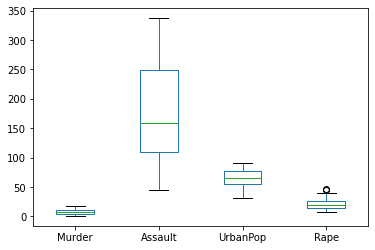

In [80]:
#Outlier Detection
b.plot(kind='box')

{'whiskers': [<matplotlib.lines.Line2D at 0x25c0e478610>,
 'caps': [<matplotlib.lines.Line2D at 0x25c0e478d00>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c0e478250>],
 'medians': [<matplotlib.lines.Line2D at 0x25c0e4843a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c0e4844f0>],
 'means': []}

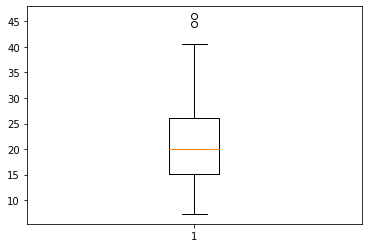

In [81]:
plt.boxplot(b['Rape'])

In [82]:
b.Rape.describe()

count    50.000000
mean     21.232000
std       9.366385
min       7.300000
25%      15.075000
50%      20.100000
75%      26.175000
max      46.000000
Name: Rape, dtype: float64

In [83]:
IQR = 26.175000 - 15.075000
IQR

11.100000000000001

In [84]:
#Calculation of upper fence
upper_fence = 11.100000000000001 + (1.5*IQR)
upper_fence

27.750000000000004

In [85]:
index=b[b.Rape>27.750000000000004].index
b = b.drop(index,axis=0)

{'whiskers': [<matplotlib.lines.Line2D at 0x25c0e4cf910>,
 'caps': [<matplotlib.lines.Line2D at 0x25c0e4cff70>,
 'boxes': [<matplotlib.lines.Line2D at 0x25c0e4cf5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x25c0e4db610>],
 'fliers': [<matplotlib.lines.Line2D at 0x25c0e4db940>],
 'means': []}

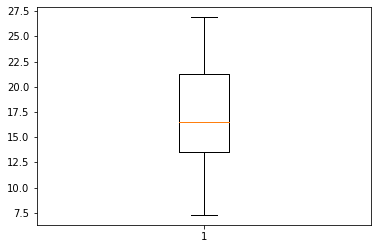

In [86]:
plt.boxplot(b['Rape'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Murder', ylabel='Density'>

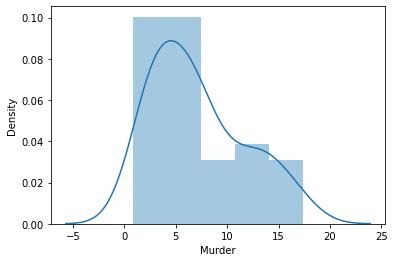

In [87]:
#To check whether the distribution is normal
sns.distplot(b['Murder'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Assault', ylabel='Density'>

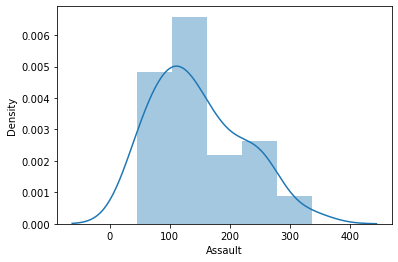

In [88]:
#To check whether the distribution is normal
sns.distplot(b['Assault'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='UrbanPop', ylabel='Density'>

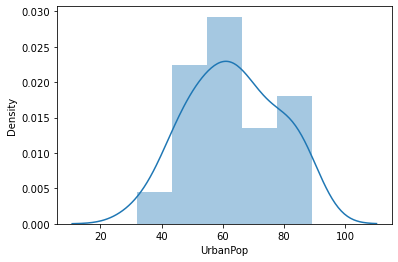

In [89]:
#To check whether the distribution is normal
sns.distplot(b['UrbanPop'])

C:\Users\G Saarika\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rape', ylabel='Density'>

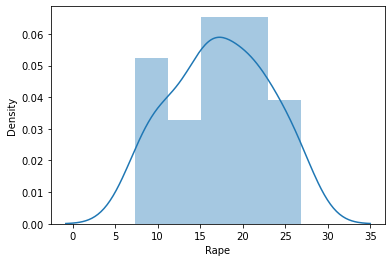

In [90]:
#To check whether the distribution is normal
sns.distplot(b['Rape'])

In [91]:
# Normalization function 
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)
# Standardization function 
def std_func(i):
    x = (i-i.mean())/(i.std())
    return (x)

In [92]:
df_norm2 = std_func(b.iloc[:,1:])
df_norm2

,Murder,Assault,UrbanPop,Rape
0,1.343886,1.190199,-0.364877,0.686965
3,0.369611,0.574330,-0.909574,0.384134
6,-0.848232,-0.496746,0.928778,-1.112207
7,-0.272524,1.216976,0.588343,-0.274969
9,2.273876,0.855488,-0.228703,1.506389
10,-0.405380,-1.353607,1.337301,0.508829
11,-1.003231,-0.362861,-0.637226,-0.559986
12,0.723893,1.364249,1.337301,1.185745
13,0.015330,-0.456581,0.111733,0.651337
14,-1.091801,-1.219722,-0.432964,-1.076580


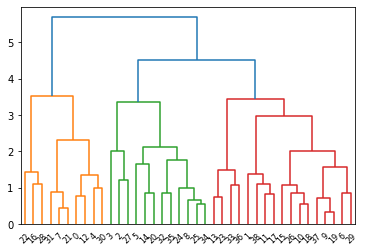

In [93]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm2, method='complete'))

In [94]:
# create clusters
hc = AgglomerativeClustering(n_clusters=6, affinity = 'euclidean', linkage = 'complete')

In [95]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm2)
Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
Clusters

,Clusters
0,1
1,0
2,5
3,5
4,1
5,2
6,0
7,1
8,2
9,0


In [96]:
df_norm3=df_norm2['h_clusterid']= pd.Series(y_hc)
df_norm3

0     1
1     0
2     5
3     5
4     1
5     2
6     0
7     1
8     2
9     0
10    0
11    0
12    1
13    4
14    2
15    0
16    3
17    0
18    0
19    0
20    2
21    1
22    3
23    4
24    2
25    2
26    0
27    5
28    3
29    0
30    1
31    1
32    2
33    4
34    2
35    2
36    4
37    0
38    0
dtype: int64

In [97]:
result1=df_norm2.iloc[:,1:].groupby(df_norm2.h_clusterid).mean()
result1

,Assault,UrbanPop,Rape,h_clusterid
h_clusterid,,,,
0.0,-0.174206,0.433599,-0.210192,0.0
1.0,1.300654,0.775582,0.789393,1.0
2.0,0.087883,0.032298,-0.076050,2.0
3.0,-0.907325,-0.364877,-0.672805,3.0
4.0,-0.108481,-0.841487,-0.393726,4.0
5.0,0.574330,-0.909574,0.384134,5.0


In [98]:
#Inferences
#The Clusters are named according to their Assault, Urbanpop & Rape so that criminal belongs to which cluster - 
#Guilty 1-Second cluster
#Guilty 2-Sixth cluster
#Guilty 3-First cluster
#Guilty 4-Third cluster
#Guilty 5-Fourth cluster
#Guilty 6-Fifth cluster
#Therefore it will easy for the Police to classify the criminals and punish them accordingly.

# Non Hierarchical Clustering

In [99]:
import matplotlib.pylab as plt
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist 

In [100]:
q = df_norm.fillna(0)
q = q.iloc[:,0:4]
q

,ID#,Balance,Qual_miles,cc1_miles
0,1,28143,0,1
1,2,19244,0,1
3,4,14776,0,1
5,6,16420,0,1
14,15,17648,0,1
...,...,...,...,...
3981,4004,1010,0,1
3983,4006,26173,0,1
3990,4013,11310,0,1
3997,4020,54899,0,1


In [101]:
kmeans_clust=KMeans(n_clusters=5)
kmeans_clust.fit(q)
q["clusterID"]=pd.Series(kmeans_clust.labels_)
q

,ID#,Balance,Qual_miles,cc1_miles,clusterID
0,1,28143,0,1,4.0
1,2,19244,0,1,4.0
3,4,14776,0,1,4.0
5,6,16420,0,1,4.0
14,15,17648,0,1,0.0
...,...,...,...,...,...
3981,4004,1010,0,1,NaN
3983,4006,26173,0,1,NaN
3990,4013,11310,0,1,NaN
3997,4020,54899,0,1,NaN


In [102]:
w = q.fillna(1)
w

,ID#,Balance,Qual_miles,cc1_miles,clusterID
0,1,28143,0,1,4.0
1,2,19244,0,1,4.0
3,4,14776,0,1,4.0
5,6,16420,0,1,4.0
14,15,17648,0,1,0.0
...,...,...,...,...,...
3981,4004,1010,0,1,1.0
3983,4006,26173,0,1,1.0
3990,4013,11310,0,1,1.0
3997,4020,54899,0,1,1.0


In [103]:
result2=w.iloc[:,0:].groupby(w.clusterID).mean()
result2

,ID#,Balance,Qual_miles,cc1_miles,clusterID
clusterID,,,,,
0.0,459.140000,25628.580000,23.560000,1.0,0.0
1.0,2603.150456,24002.424012,79.288754,1.0,1.0
2.0,287.235294,36703.588235,0.000000,1.0,2.0
3.0,336.333333,30409.444444,0.000000,1.0,3.0
4.0,393.954545,31310.863636,65.863636,1.0,4.0


In [104]:
k = list(range(2,15))
k
TWSS = [] # variable for storing total within sum of squares for each kmeans 
for i in k:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(w)
    WSS = [] # variable for storing within sum of squares for each cluster 
    for j in range(i):
        WSS.append(sum(cdist(w.iloc[kmeans.labels_==j,:],kmeans.cluster_centers_[j].reshape(1,w.shape[1]),"euclidean")))
    TWSS.append(sum(WSS))
    
TWSS

[array([9246796.28979334]),
 array([6685394.80998842]),
 array([5074438.09993238]),
 array([4014359.9735512]),
 array([3356740.19052143]),
 array([3043229.98341629]),
 array([2646163.09998042]),
 array([2569269.90643537]),
 array([2214377.14068997]),
 array([2047391.87464279]),
 array([1929691.06970169]),
 array([1882773.12259676]),
 array([1727117.16243014])]

([<matplotlib.axis.XTick at 0x25c0cafe070>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

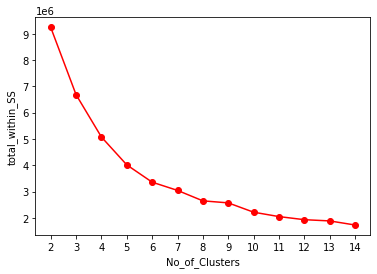

In [105]:
plt.plot(k,TWSS, 'ro-');plt.xlabel("No_of_Clusters");plt.ylabel("total_within_SS");plt.xticks(k)

In [106]:
#Inferences
#The Clusters are named according to their Assault, Urbanpop & Rape so that criminal belongs to which cluster - 
#Guilty 1-Fifth cluster
#Guilty 2-Third cluster
#Guilty 3-Second cluster
#Guilty 4-First cluster
#Guilty 5-Fourth cluster
#Therefore it will easy for the Police to classify the criminals and punish them accordingly.

# DB-SCAN

In [107]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [108]:
q = df_norm.fillna(0)
q = q.iloc[:,0:4]
array=q.values
array

array([[    1, 28143,     0,     1],
       [    2, 19244,     0,     1],
       [    4, 14776,     0,     1],
       ...,
       [ 4013, 11310,     0,     1],
       [ 4020, 54899,     0,     1],
       [ 4021,  3016,     0,     1]], dtype=int64)

In [109]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-1.89141866,  0.1221755 , -0.13473674,  0.        ],
       [-1.89058271, -0.2102032 , -0.13473674,  0.        ],
       [-1.88891081, -0.37708353, -0.13473674,  0.        ],
       ...,
       [ 1.46242249, -0.50653904, -0.13473674,  0.        ],
       [ 1.46827416,  1.12151527, -0.13473674,  0.        ],
       [ 1.46911011, -0.81632093, -0.13473674,  0.        ]])

In [110]:
dbscan = DBSCAN(eps=0.9, min_samples=4)
dbscan.fit(X)

DBSCAN(eps=0.9, min_samples=4)

In [111]:
#Noisy samples are given the label -1.
pd.Series(dbscan.labels_).value_counts()

 0    758
-1     16
 1      4
dtype: int64

In [112]:
cl= pd.DataFrame(dbscan.labels_,columns=['cluster'])
cl

,cluster
0,0
1,0
2,0
3,0
4,0
...,...
773,0
774,0
775,0
776,0


In [113]:
pd.concat([q,cl],axis=1)

,ID#,Balance,Qual_miles,cc1_miles,cluster
0,1.0,28143.0,0.0,1.0,0.0
1,2.0,19244.0,0.0,1.0,0.0
2,NaN,NaN,NaN,NaN,0.0
3,4.0,14776.0,0.0,1.0,0.0
4,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...
3981,4004.0,1010.0,0.0,1.0,NaN
3983,4006.0,26173.0,0.0,1.0,NaN
3990,4013.0,11310.0,0.0,1.0,NaN
3997,4020.0,54899.0,0.0,1.0,NaN


In [114]:
result=q.groupby(cl.cluster).mean()
result

,ID#,Balance,Qual_miles,cc1_miles
cluster,,,,
-1.0,199.00000,134601.000000,0.000000,1.0
0.0,398.52381,29023.944444,32.349206,1.0
1.0,576.00000,55703.000000,0.000000,1.0


In [115]:
#Inferences
#The Clusters are named according to their Assault, Urbanpop & Rape so that criminal belongs to which cluster - 
#Guilty 1-Third cluster
#Guilty 2-Second cluster
#Therefore it will easy for the Police to classify the criminals and punish them accordingly.